<a href="https://www.kaggle.com/code/charles01dev/houseprices-charles01?scriptVersionId=101115535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print('Data Loading is done!')

Data Loading is done!


### Exploring Data Analytics

In [3]:
print("The shape of Train Data is:", train.shape)
print("The shape od Test Data is:", test.shape)

The shape of Train Data is: (1460, 81)
The shape od Test Data is: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'SalePrice'}, xlabel='SalePrice'>

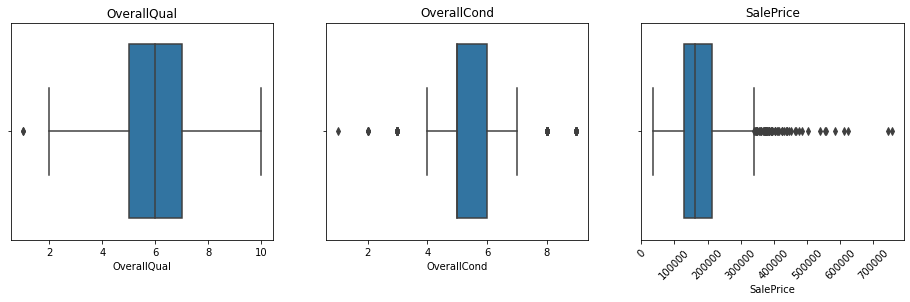

In [9]:
import warnings

warnings.filterwarnings(action='ignore')

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title("OverallQual")
sns.boxplot(train['OverallQual'])

plt.subplot(1, 3, 2)
plt.title("OverallCond")
sns.boxplot(train['OverallCond'])

plt.subplot(1, 3, 3)
plt.title("SalePrice")
plt.xticks(rotation=45)
sns.boxplot(train['SalePrice'])

## Feature Engineering
* Remove Outlier

In [10]:
train[(train['OverallQual']<4) & (train['SalePrice']>250000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
train[(train['OverallCond']<5) & (train['SalePrice']>250000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [12]:
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']>250000)].index, inplace=True)
train.drop(train[(train['OverallCond']<5) & (train['SalePrice']>250000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1459, 81)


* Log transformation of the dependent variable.

The value of mu before log transformation is: 180774.85538039752
The value of sigma before log transformation is: 79245.47033607538


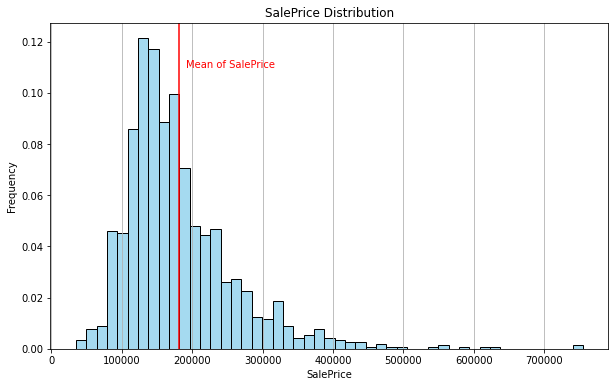

In [13]:
from scipy.stats import norm

mu, sigma = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='skyblue', stat="probability")
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice Distribution")

plt.axvline(mu, color='r', linestyle="solid")
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
fig.show()

The value of mu after log transformation is: 12.02346716381855
The value of sigma after log transformation is: 0.39881210831802794


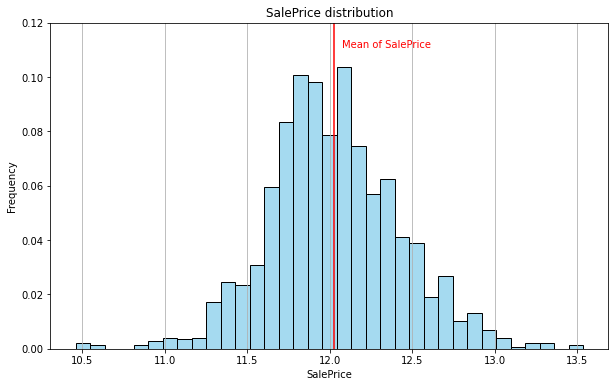

In [14]:
# Log transformation for Standard Deviation
train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu after log transformation is:", mu)
print("The value of sigma after log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color='skyblue', stat="probability")
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle="solid")
plt.text(mu+0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

## Concat the Data

In [15]:
# split the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1459, 80), (1459, 79))

In [16]:
# move 'SalePrice' column to variation 'y'
y = train['SalePrice'].reset_index(drop=True)
train = train.drop(['SalePrice'], axis=1)
train.shape, test.shape

((1459, 79), (1459, 79))

In [17]:
# concat the Data
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2918, 79)

In [18]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2918 non-null   int64  
 1   MSZoning       2914 non-null   object 
 2   LotFrontage    2432 non-null   float64
 3   LotArea        2918 non-null   int64  
 4   Street         2918 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2918 non-null   object 
 7   LandContour    2918 non-null   object 
 8   Utilities      2916 non-null   object 
 9   LotConfig      2918 non-null   object 
 10  LandSlope      2918 non-null   object 
 11  Neighborhood   2918 non-null   object 
 12  Condition1     2918 non-null   object 
 13  Condition2     2918 non-null   object 
 14  BldgType       2918 non-null   object 
 15  HouseStyle     2918 non-null   object 
 16  OverallQual    2918 non-null   int64  
 17  OverallCond    2918 non-null   int64  
 18  YearBuil

## Processing missing value

In [19]:
def check_na(data, head_num=6):
    isnull_na = (data.isnull().sum()/len(data))*100
    data_na = isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na,
                                 'Data Type' : data.dtypes[data_na.index]})
    print("the column and the number of the missing value:\n", missing_data.head(head_num))
    
check_na(all_df, 20)

the column and the number of the missing value:
               Missing Ratio Data Type
PoolQC            99.657300    object
MiscFeature       96.401645    object
Alley             93.214531    object
Fence             80.431803    object
FireplaceQu       48.663468    object
LotFrontage       16.655243   float64
GarageFinish       5.448938    object
GarageQual         5.448938    object
GarageCond         5.448938    object
GarageYrBlt        5.448938   float64
GarageType         5.380398    object
BsmtExposure       2.810144    object
BsmtCond           2.810144    object
BsmtQual           2.775874    object
BsmtFinType2       2.741604    object
BsmtFinType1       2.707334    object
MasVnrType         0.822481    object
MasVnrArea         0.788211   float64
MSZoning           0.137080    object
BsmtFullBath       0.068540   float64


In [20]:
# drop columns
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df, 20)

the column and the number of the missing value:
               Missing Ratio Data Type
GarageCond         5.448938    object
GarageQual         5.448938    object
GarageYrBlt        5.448938   float64
GarageFinish       5.448938    object
GarageType         5.380398    object
BsmtCond           2.810144    object
BsmtExposure       2.810144    object
BsmtQual           2.775874    object
BsmtFinType2       2.741604    object
BsmtFinType1       2.707334    object
MasVnrType         0.822481    object
MasVnrArea         0.788211   float64
MSZoning           0.137080    object
Functional         0.068540    object
Utilities          0.068540    object
BsmtFullBath       0.068540   float64
BsmtHalfBath       0.068540   float64
GarageArea         0.034270   float64
GarageCars         0.034270   float64
TotalBsmtSF        0.034270   float64


* processing missing value about dtype object

In [21]:
cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)
print("The whole number of final_cat_vars", len(final_cat_vars))

for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])
    
check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 38
the column and the number of the missing value:
               Missing Ratio Data Type
GarageYrBlt        5.448938   float64
MasVnrArea         0.788211   float64
BsmtFullBath       0.068540   float64
BsmtHalfBath       0.068540   float64
BsmtFinSF1         0.034270   float64
BsmtFinSF2         0.034270   float64
BsmtUnfSF          0.034270   float64
TotalBsmtSF        0.034270   float64
GarageCars         0.034270   float64
GarageArea         0.034270   float64


* processing missing value for float64

In [22]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

num_all_vars.remove('LotFrontage')

print("The whole number of num_all_vars", len(num_all_vars))
for i in num_all_vars:
    all_df[i].fillna(value=all_df[i].median(), inplace=True)
    
check_na(all_df, 20)


The whole number of all_vars 36
The whole number of num_all_vars 35
the column and the number of the missing value:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


* Processing for Skewness values

In [23]:
from scipy.stats import skew

def find_skew(x):
    return skew(x)

skew_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_features

MiscVal          21.943434
PoolArea         16.895403
LotArea          12.820553
LowQualFinSF     12.086650
3SsnPorch        11.374072
KitchenAbvGr      4.301402
BsmtFinSF2        4.145323
EnclosedPorch     4.003118
ScreenPorch       3.945898
BsmtHalfBath      3.930795
MasVnrArea        2.616251
OpenPorchSF       2.534720
WoodDeckSF        1.842295
1stFlrSF          1.471643
BsmtFinSF1        1.427292
MSSubClass        1.375092
GrLivArea         1.270065
TotalBsmtSF       1.164202
BsmtUnfSF         0.919263
2ndFlrSF          0.861159
TotRmsAbvGrd      0.759302
Fireplaces        0.734074
HalfBath          0.695616
BsmtFullBath      0.625782
OverallCond       0.581250
BedroomAbvGr      0.328774
GarageArea        0.241598
OverallQual       0.196611
MoSold            0.195770
FullBath          0.166983
YrSold            0.132672
GarageCars       -0.218642
GarageYrBlt      -0.398247
YearRemodAdd     -0.450669
YearBuilt        -0.599607
dtype: float64

In [24]:
# make skew_features's index without 'LotArea' and make dataframe all_numeric_df by skew_features's index
skewnewss_index = list(skew_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

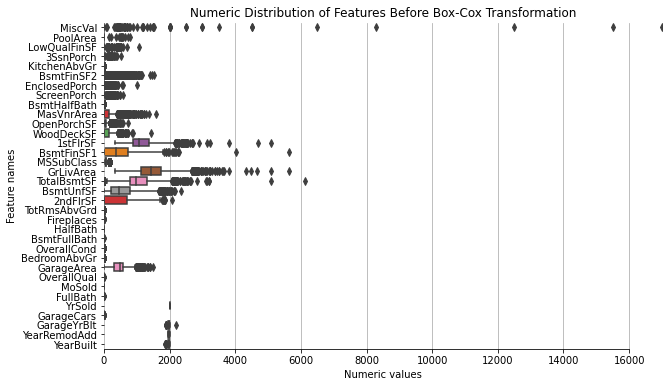

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax = sns.boxplot(data=all_numeric_df[skewnewss_index], orient="h", palette="Set1")
ax.xaxis.grid(True)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

In [26]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 1]
high_skew_index = high_skew.index
print("The data before Box-Cox Transformation: \n", all_df[high_skew_index].head())

for num_var in high_skew_index:
    all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var] + 1))
    
print("The data after Box-Cox Transformation: \n", all_df[high_skew_index].head())

The data before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61         

* Generative derived variables

In [27]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

all_df.shape

(2918, 74)

In [28]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))

all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])

all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch','ScreenPorch'], axis=1)

all_df.shape

(2918, 68)